<a href="https://colab.research.google.com/github/AntonisGantzos/ICDAR-Paper-Classification/blob/main/Paper_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paper Classification Project
The goal of this project is to extrac information regarding the title and author(s) from papers and subsequenlty classify them into one of the following categories :
- Tables
- Classification
- Key Information Extraction
- Optical Character Recognition
- Datasets
- Document Layout Understanding
- Others

After analyzing the abstract and the title for each pdf, we will be adding the following 3 categories to the already established ones, in order to make the classification a bit more specific
- Deep Learning Models
- Multimodal Document Analysis
- Handwriting Recognition

#Step 1 : Retrieval, Visualization and Extraction of our data

In [1]:
try:
  import pymupdf
except:
  !pip install pymupdf
  import pymupdf

In [2]:
#get the file containing the subset
import requests
import zipfile
from pathlib import Path

data_path=Path("/data")

pdf_path=data_path / "pdf_data"

#if the folder does not exist download it and prepare it
if pdf_path.is_dir():
  print(f"{pdf_path} directory already exists")
else:
  print(f"{pdf_path} does not exist, creating directory...")
  pdf_path.mkdir(parents=True, exist_ok=True)


# Download zip file containing pdf data
with open(data_path / "ICDAR2024_papers.zip", "wb") as f:
    request = requests.get("https://github.com/Captonomy/assessment/raw/refs/heads/main/ml-engineer/ICDAR2024_papers.zip")
    print("Downloading pdf data...")
    f.write(request.content)

# Unzip file
with zipfile.ZipFile(data_path / "ICDAR2024_papers.zip", "r") as zip_ref:
    print("Unzipping pdf data...")
    zip_ref.extractall(pdf_path)

/data/pdf_data directory already exists
Unzipping pdf data...


In [3]:
#we have to have a good understanding of our dataset before we start building our model
import os
def walk_through_dir(dir_path) :
  #walks thorugh a dir path returning its contents
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(filenames)} pdfs in {dirpath} ")


walk_through_dir(pdf_path)

There are 0 pdfs in /data/pdf_data 
There are 50 pdfs in /data/pdf_data/Data 


In [4]:
#list all pdf paths
import pathlib
pdf_paths=list(pdf_path.glob("*/*.pdf"))
print(pdf_paths[:10])


[PosixPath('/data/pdf_data/Data/0049.pdf'), PosixPath('/data/pdf_data/Data/0044.pdf'), PosixPath('/data/pdf_data/Data/0086.pdf'), PosixPath('/data/pdf_data/Data/0020.pdf'), PosixPath('/data/pdf_data/Data/0089.pdf'), PosixPath('/data/pdf_data/Data/0083.pdf'), PosixPath('/data/pdf_data/Data/0027.pdf'), PosixPath('/data/pdf_data/Data/0045.pdf'), PosixPath('/data/pdf_data/Data/0060.pdf'), PosixPath('/data/pdf_data/Data/0051.pdf')]


#Iterate through our data
Before proceeding witht the extraction lets view the contents of each .pdf file to get an idea of the general shape and look of our data

In [5]:
def iterate_pdf(pdf_path):
  doc = pymupdf.open(pdf_path) # open a document
  out = open("output.txt", "wb") # create a text output
  for page in doc: # iterate the document pages
      text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
      print(text)
      out.write(text) # write text of page
      out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
      lines = text.splitlines()

      # Assuming the title is in the first line and authors in the next few lines
      title = lines[0:2]
      authors = lines[2:5]
      abstract = lines[3:25]

      print(f"Title: {title}")
      print(f"Authors: {authors}")
      print(f"Abstract: {abstract}")

  out.close()

In [6]:
#take all pdf paths and add them in a list
import random
#set seed to control the random result (optional)
random.seed(22)
#pick one of the pdf paths in the list in random
random_pdf_path=random.choice(pdf_paths)
#show contents of the pdf file
iterate_pdf(random_pdf_path)

b'Multi-Cell Decoder and Mutual Learning for\nTable Structure and Character Recognition\nTakaya Kawakatsui[0000-0003-1285-2748]\nPreferred Networks, Inc., 1-6-1 Otemachi, Chiyoda, Tokyo, Japan.\nkat.nii.ac.jp@gmail.com\nhttps://researchmap.jp/t.kat\nAbstract. Extracting table contents from documents such as scientific\npapers and financial reports and converting them into a format that can\nbe processed by large language models is an important task in knowledge\ninformation processing. End-to-end approaches, which recognize not only\ntable structure but also cell contents, achieved performance comparable\nto state-of-the-art models using external character recognition systems,\nand have potential for further improvements. In addition, these models\ncan now recognize long tables with hundreds of cells by introducing local\nattention. However, the models recognize table structure in one direction\nfrom the header to the footer, and cell content recognition is performed\nindependently for

# Data extraction
We will be using the function below to store all relative metadata (title, authors) from each file, and store it in a dictionary

In [7]:
def get_text_metadata(pdf_paths):
  text_metadata = {}
  i=0
  for pdf_path in pdf_paths:
      # Open the PDF file
      doc = pymupdf.open(pdf_path) # open a document
      out = open("output.txt", "wb") # create a text output
      for page in doc: # iterate the document pages
          text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
          print(text)
          print(f"metadata {doc.metadata}")
          out.write(text) # write text of page
          out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
          lines = text.splitlines()

          # Assuming the title is in the first line and authors in the next few lines
          title = lines[0:2]
          authors = lines[2:5]

          # Decode bytes to strings
          title = [x.decode('utf-8') if isinstance(x, bytes) else x for x in title]
          authors = [x.decode('utf-8') if isinstance(x, bytes) else x for x in authors]

          print(f"Title: {title}")
          print(f"Authors: {authors}")

      print(f"Authors: {', '.join(authors)} \n")
      #add author and title in a dictioanry
      text_metadata[i] = {'id':pdf_path.name, 'title': ' '.join(title), 'authors': ', '.join(authors)}
      i+=1

  return text_metadata

In [8]:
text_metadata = get_text_metadata(pdf_paths)
text_metadata

b"Synthesizing Realistic Data for Table\nRecognition\nQiyu Houl [0009-0009-4150-9907], Jun wangl [0000-0002-9515-076X] P.A/) Meixuan\nQiao2, and Lujun Tianl\n1 iWudao Tech\nfhougyjwang,tianljlftwudao.tech\n2 Huazhong University of Science and Technology\ncliaomeixuanelhust.edu.cn\nAbstract. To overcome the limitations and challenges of current au-\ntomatic table data annotation methods and random table data synthe-\nsis approaches, we propose a novel method for synthesizing annotation\ndata specifically designed for table recognition. This method utilizes the\nstructure and content of existing complex tables, facilitating the efficient\ncreation of tables that closely replicate the authentic styles found in the\ntarget domain. By leveraging the actual structure and content of tables\nfrom Chinese financial announcements, we have developed the first ex-\ntensive table annotation dataset in this domain. We used this dataset\nto train several recent deep learning-based end-to-end table re

{0: {'id': '0049.pdf',
  'title': 'Synthesizing Realistic Data for Table Recognition',
  'authors': 'Qiyu Houl [0009-0009-4150-9907], Jun wangl [0000-0002-9515-076X] P.A/) Meixuan, Qiao2, and Lujun Tianl, 1 iWudao Tech'},
 1: {'id': '0044.pdf',
  'title': '1 DLAFormer: An End-to-End Transformer For',
  'authors': 'Document Layout Analysis, Jiawei Wang1,2,*,t, Kai Hui ,2,*, t , and Qiang Huo2, Department of EEIS, University of Science and Technology of China, Hefei, China'},
 2: {'id': '0086.pdf',
  'title': 'Handwritten Document Recognition Using Pre-trained Vision Transformers',
  'authors': 'Daniel Parresl [0000-0002-2078-0329] , Dan Aniteii [0000-0001 —8288-6009] , and, Roberto Paredes1,2 [0000-0002-5192-0021], 1 PRHLT Research Center, Universitat Politecnica Valencia, Valencia, Spain'},
 3: {'id': '0020.pdf',
  'title': 'Improving Automatic Text Recognition with Language Models in the PyLaia Open-Source',
  'authors': 'Library, Solene Tarride[0000-0001-6174-9865], -‘,'},
 4: {'id':

In [9]:
#use pandas to make a dataset from the dictionary containing text metadata
import pandas as pd
df=pd.DataFrame(text_metadata).T
df.head()

,id,title,authors
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl [0009-0009-4150-9907], Jun wangl [00..."
1,0044.pdf,1 DLAFormer: An End-to-End Transformer For,"Document Layout Analysis, Jiawei Wang1,2,*,t, ..."
2,0086.pdf,Handwritten Document Recognition Using Pre-tra...,"Daniel Parresl [0000-0002-2078-0329] , Dan Ani..."
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride[0000-0001-6174-9865], -‘,"
4,0089.pdf,Global-SEG: Text Semantic Segmentation Based o...,"Wenjun Sunl [0009-0002-7857-8737] , Hanh Thi H..."


#Step 2 : Pre-Processing the data
Now we have imported our dataset we can start "cleaning up" our data so that it is of better use, when we start feeding it to our model. FIrstly, some key actrions we have to take :

- Remove missing values (if they exist)
- Remove duplicate data entries (if they exist)
- Lower casing all data entries
- Remove punctuation from all data entries We perform actions 3 and 4 so that for example the word "Hello!" is treated the same way and has the same numerical value as the word "HELLO" and the word "hello."
- Remove all stopwords since they dont provide valuable information in analysing the text
- Remove all URLs from the text since they dont provide any info or have any value in our dataset


In [10]:
#get additional info about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       50 non-null     object
 1   title    50 non-null     object
 2   authors  50 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [11]:
#drop duplicates and check the shape of our data again

df.drop_duplicates(inplace=True)
print(f"the shape of our data when duplicates are removed is {df.shape}")

the shape of our data when duplicates are removed is (50, 3)


In [12]:
#now to check for missing values in each column
print(f"total missing values in our dataset are : {df.isnull().sum()}")

#remove all missing values and check the shape
df.dropna(axis=0, inplace=True)
print(f"the shape of our data after removing all null/missing values is {df.shape}")

total missing values in our dataset are : id         0
title      0
authors    0
dtype: int64
the shape of our data after removing all null/missing values is (50, 3)


In [13]:
#lower casing all columns. We will be initializing 2 new columns that will correspond to the pre-processed values of our titles and authors.
#we want to save the original values in order to use them in the end by inserting them in the outputs json file
df['title_preprocessed']=df["title"].str.lower()
df['authors_preprocessed']=df['authors'].str.lower()
df.head()

,id,title,authors,title_preprocessed,authors_preprocessed
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl [0009-0009-4150-9907], Jun wangl [00...",synthesizing realistic data for table recognition,"qiyu houl [0009-0009-4150-9907], jun wangl [00..."
1,0044.pdf,1 DLAFormer: An End-to-End Transformer For,"Document Layout Analysis, Jiawei Wang1,2,*,t, ...",1 dlaformer: an end-to-end transformer for,"document layout analysis, jiawei wang1,2,*,t, ..."
2,0086.pdf,Handwritten Document Recognition Using Pre-tra...,"Daniel Parresl [0000-0002-2078-0329] , Dan Ani...",handwritten document recognition using pre-tra...,"daniel parresl [0000-0002-2078-0329] , dan ani..."
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride[0000-0001-6174-9865], -‘,",improving automatic text recognition with lang...,"library, solene tarride[0000-0001-6174-9865], -‘,"
4,0089.pdf,Global-SEG: Text Semantic Segmentation Based o...,"Wenjun Sunl [0009-0002-7857-8737] , Hanh Thi H...",global-seg: text semantic segmentation based o...,"wenjun sunl [0009-0002-7857-8737] , hanh thi h..."


In [14]:
#remove punctuation besides ','
import string

# Define punctuation to remove, excluding the comma
PUNCT_TO_REMOVE = string.punctuation.replace(',', '')

def remove_punctuation(text):
    """custom function to remove the punctuation except commas"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['title_preprocessed'] = df['title_preprocessed'].apply(lambda text: remove_punctuation(text))
df['authors_preprocessed']=df['authors_preprocessed'].apply(lambda text: remove_punctuation(text))
df['title'] = df['title'].apply(lambda text: remove_punctuation(text))
df['authors']=df['authors'].apply(lambda text: remove_punctuation(text))

df.head()

,id,title,authors,title_preprocessed,authors_preprocessed
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl 0009000941509907, Jun wangl 00000002...",synthesizing realistic data for table recognition,"qiyu houl 0009000941509907, jun wangl 00000002..."
1,0044.pdf,1 DLAFormer An EndtoEnd Transformer For,"Document Layout Analysis, Jiawei Wang1,2,,t, K...",1 dlaformer an endtoend transformer for,"document layout analysis, jiawei wang1,2,,t, k..."
2,0086.pdf,Handwritten Document Recognition Using Pretrai...,"Daniel Parresl 0000000220780329 , Dan Aniteii ...",handwritten document recognition using pretrai...,"daniel parresl 0000000220780329 , dan aniteii ..."
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride0000000161749865, ‘,",improving automatic text recognition with lang...,"library, solene tarride0000000161749865, ‘,"
4,0089.pdf,GlobalSEG Text Semantic Segmentation Based on ...,"Wenjun Sunl 0009000278578737 , Hanh Thi Hong, ...",globalseg text semantic segmentation based on ...,"wenjun sunl 0009000278578737 , hanh thi hong, ..."


In [15]:
import re
#we want to remove unrelated numbers from all of our columns, not just those that are to be pre-processed
def remove_numbers(text):
    """
    This function removes all numbers from the input string.

    :param text: The string from which to remove numbers
    :return: A new string with all numbers removed
    """
    return re.sub(r'\d+', ' ', text)

for column in df.columns:
    if column == 'id':
        continue
    print(f"Removing numbers from {column}")
    df[column] = df[column].apply(remove_numbers)

df.head()


Removing numbers from title
Removing numbers from authors
Removing numbers from title_preprocessed
Removing numbers from authors_preprocessed


,id,title,authors,title_preprocessed,authors_preprocessed
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl , Jun wangl X PA Meixuan, Qiao , a...",synthesizing realistic data for table recognition,"qiyu houl , jun wangl x pa meixuan, qiao , a..."
1,0044.pdf,DLAFormer An EndtoEnd Transformer For,"Document Layout Analysis, Jiawei Wang , ,,t, K...",dlaformer an endtoend transformer for,"document layout analysis, jiawei wang , ,,t, k..."
2,0086.pdf,Handwritten Document Recognition Using Pretrai...,"Daniel Parresl , Dan Aniteii — , and, Rob...",handwritten document recognition using pretrai...,"daniel parresl , dan aniteii — , and, rob..."
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride , ‘,",improving automatic text recognition with lang...,"library, solene tarride , ‘,"
4,0089.pdf,GlobalSEG Text Semantic Segmentation Based on ...,"Wenjun Sunl , Hanh Thi Hong, Tran , , Car...",globalseg text semantic segmentation based on ...,"wenjun sunl , hanh thi hong, tran , , car..."


In [16]:
#remove all special characters from the dataset
df['title'] = df['title'].str.replace('[^a-zA-Z0-9\s]', ' ')
df['authors'] = df['authors'].str.replace('[^a-zA-Z0-9\s]', ' ')
df['authors_preprocessed'] = df['authors_preprocessed'].str.replace('[^a-zA-Z0-9\s]', ' ')
df['title_preprocessed'] = df['title_preprocessed'].str.replace('[^a-zA-Z0-9\s]', ' ')
df.head()

,id,title,authors,title_preprocessed,authors_preprocessed
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl , Jun wangl X PA Meixuan, Qiao , a...",synthesizing realistic data for table recognition,"qiyu houl , jun wangl x pa meixuan, qiao , a..."
1,0044.pdf,DLAFormer An EndtoEnd Transformer For,"Document Layout Analysis, Jiawei Wang , ,,t, K...",dlaformer an endtoend transformer for,"document layout analysis, jiawei wang , ,,t, k..."
2,0086.pdf,Handwritten Document Recognition Using Pretrai...,"Daniel Parresl , Dan Aniteii — , and, Rob...",handwritten document recognition using pretrai...,"daniel parresl , dan aniteii — , and, rob..."
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride , ‘,",improving automatic text recognition with lang...,"library, solene tarride , ‘,"
4,0089.pdf,GlobalSEG Text Semantic Segmentation Based on ...,"Wenjun Sunl , Hanh Thi Hong, Tran , , Car...",globalseg text semantic segmentation based on ...,"wenjun sunl , hanh thi hong, tran , , car..."


In [17]:
#view all stopwords that we need to remove
from nltk.corpus import stopwords
import nltk

try:
  nltk.download('stopwords')
except:
  print("error in downloading stopwords")

", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
#use a function to remove all stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['title_preprocessed'] = df["title_preprocessed"].apply(lambda text: remove_stopwords(text))
df['authors_preprocessed']=df['authors_preprocessed'].apply(lambda text: remove_stopwords(text))
df.head()

,id,title,authors,title_preprocessed,authors_preprocessed
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl , Jun wangl X PA Meixuan, Qiao , a...",synthesizing realistic data table recognition,"qiyu houl , jun wangl x pa meixuan, qiao , luj..."
1,0044.pdf,DLAFormer An EndtoEnd Transformer For,"Document Layout Analysis, Jiawei Wang , ,,t, K...",dlaformer endtoend transformer,"document layout analysis, jiawei wang , ,,t, k..."
2,0086.pdf,Handwritten Document Recognition Using Pretrai...,"Daniel Parresl , Dan Aniteii — , and, Rob...",handwritten document recognition using pretrai...,"daniel parresl , dan aniteii — , and, roberto ..."
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride , ‘,",improving automatic text recognition language ...,"library, solene tarride , ‘,"
4,0089.pdf,GlobalSEG Text Semantic Segmentation Based on ...,"Wenjun Sunl , Hanh Thi Hong, Tran , , Car...",globalseg text semantic segmentation based glo...,"wenjun sunl , hanh thi hong, tran , , carlosem..."


In [19]:
#remove all urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["title"] = df["title"].apply(lambda text: remove_urls(text))
df['authors']=df['authors'].apply(lambda text: remove_urls(text))
df['title_preprocessed'] = df["title_preprocessed"].apply(lambda text: remove_urls(text))
df['authors_preprocessed']=df['authors_preprocessed'].apply(lambda text: remove_urls(text))
df.head()

,id,title,authors,title_preprocessed,authors_preprocessed
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl , Jun wangl X PA Meixuan, Qiao , a...",synthesizing realistic data table recognition,"qiyu houl , jun wangl x pa meixuan, qiao , luj..."
1,0044.pdf,DLAFormer An EndtoEnd Transformer For,"Document Layout Analysis, Jiawei Wang , ,,t, K...",dlaformer endtoend transformer,"document layout analysis, jiawei wang , ,,t, k..."
2,0086.pdf,Handwritten Document Recognition Using Pretrai...,"Daniel Parresl , Dan Aniteii — , and, Rob...",handwritten document recognition using pretrai...,"daniel parresl , dan aniteii — , and, roberto ..."
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride , ‘,",improving automatic text recognition language ...,"library, solene tarride , ‘,"
4,0089.pdf,GlobalSEG Text Semantic Segmentation Based on ...,"Wenjun Sunl , Hanh Thi Hong, Tran , , Car...",globalseg text semantic segmentation based glo...,"wenjun sunl , hanh thi hong, tran , , carlosem..."


In [20]:
!pip install transformers

In [21]:
#set labels that papers are to be classified into
classes = ['Tables',
'Classification',
'Key Information Extraction',
'Optical Character Recognition',
'Datasets',
'Document Layout Understanding',
'Others',
'Deep Learning Models',
'Multimodal Document Analysis',
'Handwriting Recognition']

In [22]:
len(classes)

10

#Zero shot classification Implementation
Since we are dealing with an unlabeled dataset, we will be using a zero-shot classification approach, meaning that we will be attempting to use an already trained model on our own data to make predictions, in order to avoid training it from scratch. More specifically we will be using a pre-trained model from HuggingFace used for multi-class classification and apply it on our own features and labels. Firstly we test it out on a random record, and then we will proceed by applying the process on the whole dataset  

In [23]:
import numpy as np
# Use a pipeline as a high-level helper
from transformers import pipeline

zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
sequence = df['title_preprocessed'][0] + " " + df['authors_preprocessed'][0]
print(sequence)

zero_shot_classifier(sequence, classes)

synthesizing realistic data table recognition qiyu houl , jun wangl x pa meixuan, qiao , lujun tianl, iwudao tech


{'sequence': 'synthesizing realistic data table recognition qiyu houl , jun wangl x pa meixuan, qiao , lujun tianl, iwudao tech',
 'labels': ['Tables',
  'Datasets',
  'Others',
  'Key Information Extraction',
  'Multimodal Document Analysis',
  'Deep Learning Models',
  'Document Layout Understanding',
  'Classification',
  'Optical Character Recognition',
  'Handwriting Recognition'],
 'scores': [0.575657308101654,
  0.14436371624469757,
  0.08407388627529144,
  0.04487946256995201,
  0.040758635848760605,
  0.03771326318383217,
  0.03026938997209072,
  0.015615738928318024,
  0.01465910580009222,
  0.012009557336568832]}

In [25]:
df['label'] = None
for i in range(len(df)):
  sequence = df['title_preprocessed'][i] + " " + df['authors_preprocessed'][i]
  prediction = zero_shot_classifier(sequence, classes)
  print(prediction)
  #find the position of the max score
  max_score_index = np.argmax(prediction['scores'])
  #add it as the most likely label column to the dataset
  df.loc[i, "label"] = prediction['labels'][max_score_index]


{'sequence': 'synthesizing realistic data table recognition qiyu houl , jun wangl x pa meixuan, qiao , lujun tianl, iwudao tech', 'labels': ['Tables', 'Datasets', 'Others', 'Key Information Extraction', 'Multimodal Document Analysis', 'Deep Learning Models', 'Document Layout Understanding', 'Classification', 'Optical Character Recognition', 'Handwriting Recognition'], 'scores': [0.575657308101654, 0.14436371624469757, 0.08407388627529144, 0.04487946256995201, 0.040758635848760605, 0.03771326318383217, 0.03026938997209072, 0.015615738928318024, 0.01465910580009222, 0.012009557336568832]}
{'sequence': 'dlaformer endtoend transformer document layout analysis, jiawei wang , ,,t, kai hui , ,, , qiang huo , department eeis, university science technology china, hefei, china', 'labels': ['Deep Learning Models', 'Others', 'Multimodal Document Analysis', 'Datasets', 'Key Information Extraction', 'Classification', 'Document Layout Understanding', 'Tables', 'Optical Character Recognition', 'Handwr

In [26]:
df.head(len(df))

,id,title,authors,title_preprocessed,authors_preprocessed,label
0,0049.pdf,Synthesizing Realistic Data for Table Recognition,"Qiyu Houl , Jun wangl X PA Meixuan, Qiao , a...",synthesizing realistic data table recognition,"qiyu houl , jun wangl x pa meixuan, qiao , luj...",Tables
1,0044.pdf,DLAFormer An EndtoEnd Transformer For,"Document Layout Analysis, Jiawei Wang , ,,t, K...",dlaformer endtoend transformer,"document layout analysis, jiawei wang , ,,t, k...",Deep Learning Models
2,0086.pdf,Handwritten Document Recognition Using Pretrai...,"Daniel Parresl , Dan Aniteii — , and, Rob...",handwritten document recognition using pretrai...,"daniel parresl , dan aniteii — , and, roberto ...",Handwriting Recognition
3,0020.pdf,Improving Automatic Text Recognition with Lang...,"Library, Solene Tarride , ‘,",improving automatic text recognition language ...,"library, solene tarride , ‘,",Others
4,0089.pdf,GlobalSEG Text Semantic Segmentation Based on ...,"Wenjun Sunl , Hanh Thi Hong, Tran , , Car...",globalseg text semantic segmentation based glo...,"wenjun sunl , hanh thi hong, tran , , carlosem...",Others
5,0083.pdf,ImpressionCLIP Contrastive ShapeImpression Emb...,"Yugo Kubota, Daichi Haraguchi , and, Seiichi U...",impressionclip contrastive shapeimpression emb...,"yugo kubota, daichi haraguchi , and, seiichi u...",Others
6,0027.pdf,Towards EndtoEnd SemiSupervised Table Detectio...,"Tahira Shehzadi , , X Shalini Sarode , ,, Di...",towards endtoend semisupervised table detectio...,"tahira shehzadi , , x shalini sarode , ,, didi...",Tables
7,0045.pdf,UniVIE A Unified Label Space Approach to Visua...,"Documents, Kai Hul t , Jiawei Wang , ,, Weihon...",univie unified label space approach visual inf...,"documents, kai hul , jiawei wang , ,, weihong ...",Document Layout Understanding
8,0060.pdf,MultiCell Decoder and Mutual Learning for Tabl...,"Takaya Kawakatsui , Preferred Networks, Inc, ...",multicell decoder mutual learning table struct...,"takaya kawakatsui , preferred networks, inc, o...",Tables
9,0051.pdf,SourceFree Domain Adaptation for Optical Music...,"Adrian Rose , Eliseo FuentesMartinezi , Maria ...",sourcefree domain adaptation optical music rec...,"adrian rose , eliseo fuentesmartinezi , maria ...",Others


<Axes: ylabel='count'>

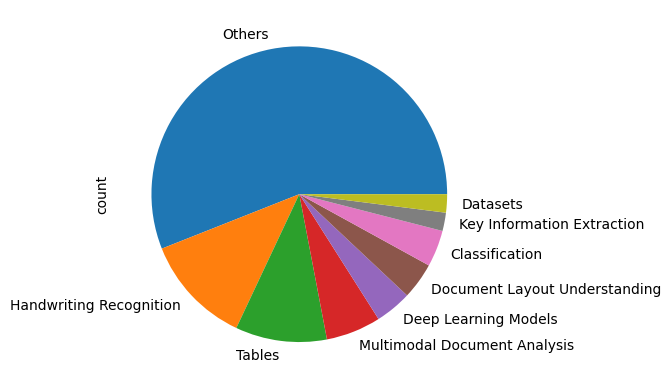

In [27]:
#plot the results in a pie diagramm
df['label'].value_counts().plot(kind='pie')


<Axes: xlabel='label'>

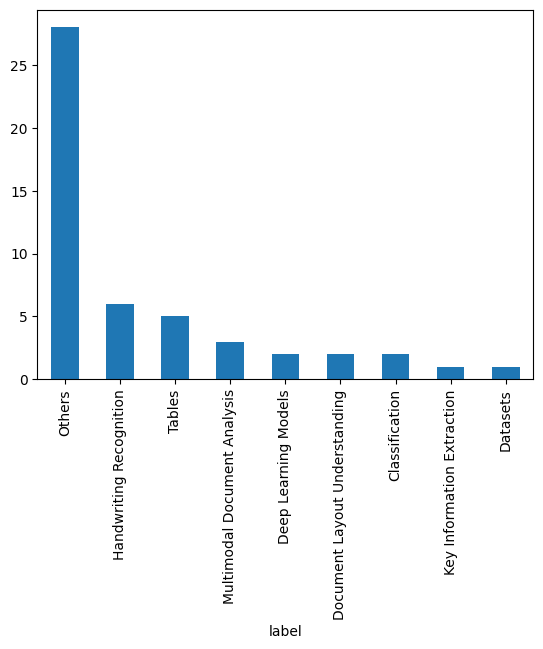

In [28]:
#plot it as a bar
df['label'].value_counts().plot(kind='bar')

#Putting everything together
Lastly we need to gather all our results and organize them in a json file

In [29]:
import json
import re

# Initialize a dictionary for storing categorized data
output_json = {
    "Tables": [],
    "Classification": [],
    "Key Information Extraction": [],
    "Optical Character Recognition": [],
    "Datasets": [],
    "Document Layout Understanding": [],
    "Others": [],
    "Deep Learning Models": [],
    "Multimodal Document Analysis": [],
    "Handwriting Recognition": []
}

# Function to clean the authors string and remove empty/space-only values
def clean_authors(authors_string):
    # Remove non-alphabetic characters, except for commas
    cleaned_string = re.sub(r'[^a-zA-Z, ]+', '', authors_string)
    # Split by commas and strip any leading/trailing whitespace from each name
    authors_list = [author.strip() for author in cleaned_string.split(',')]
    # Remove any empty strings or strings that are just spaces
    authors_list = [author for author in authors_list if author]
    return authors_list

# Iterate through the DataFrame and populate the corresponding category
for _, row in df.iterrows():
    paper_info = {
        "originalFileName": row['id'],
        "title": row['title'],
        # Clean and split the authors string
        "authors": clean_authors(row['authors'])
    }

    # Append the paper info to the corresponding category
    if row['label'] in output_json:
        output_json[row['label']].append(paper_info)
    else:
        output_json['Others'].append(paper_info)  # Default to 'Others' if label is not predefined

# Output the JSON structure
output_json_str = json.dumps(output_json, indent=4)
print(output_json_str)

# Save the output to a JSON file
with open('categorized_papers.json', 'w') as f:
    f.write(output_json_str)


{
    "Tables": [
        {
            "originalFileName": "0049.pdf",
            "title": "Synthesizing Realistic Data for Table Recognition",
            "authors": [
                "Qiyu Houl",
                "Jun wangl  X PA Meixuan",
                "Qiao",
                "and Lujun Tianl",
                "iWudao Tech"
            ]
        },
        {
            "originalFileName": "0027.pdf",
            "title": "Towards EndtoEnd SemiSupervised Table Detection with Semantic Aligned Matching Transformer",
            "authors": [
                "Tahira Shehzadi",
                "X Shalini Sarode",
                "Didier Stricker",
                "and Muhammad Zeshan Afza",
                "Department of Computer Science",
                "Technical University of Kaiserslautern",
                "Germany"
            ]
        },
        {
            "originalFileName": "0060.pdf",
            "title": "MultiCell Decoder and Mutual Learning for Table Structure and Ch